## Use the same blocks for the kawasaki all_nsample1000 test run analysis
---

In [1]:
### Starting here:
from os.path import join, basename, exists
import os
import yaml
import pandas as pd 
import numpy as np
from glob import glob
%load_ext autoreload
%autoreload 2

from src.config import DATA_DIR, PARAMS_DIR, RESULTS, ROOT_DIR
print(DATA_DIR)


#The parameter file depending on the analysis
parameter_f = join(PARAMS_DIR, "kawasaki", "test_run", "kawasaki_snakemake_all_nsample1000.yaml")
# with open(parameter_f,'r') as f:
#     params = yaml.load(f, Loader=yaml.Loader)
with open(parameter_f, 'r') as f:
    params = yaml.safe_load(f)

print(parameter_f)
print(params)

### Make results directory 

results_dir =  join(RESULTS, params["prefix"])
print(results_dir)
if not exists(RESULTS):
    print(f"{RESULTS} is not made yet! Make that first")

else:
    if not exists(results_dir):
        os.makedirs(results_dir)


os.chdir(ROOT_DIR)


Project Directory: /data2/isshamie/time_neutrophils
/data2/isshamie/time_neutrophils/data
/data2/isshamie/time_neutrophils/parameters/kawasaki/test_run/kawasaki_snakemake_all_nsample1000.yaml
{'raw_dir': 'raw/kawasaki/FCS Files/', 'prefix': 'kawasaki/test_run/all_nsample1000', 'tidy_name': 'tidy', 'is_kawa': True, 'wells': None, 'name': {'start': 'Test Run - ', 'end': '.csv'}, 'features': ['Cell Tracker Intensity', 'PI Intensity', 'AnexinV Intensity', 'Cell Aspect Ratio', 'Cell Size', 'Cell Circularity'], 'normalizations': ['log10_z'], 'reduction': 'umap', 'n_subsample': 0.25, 'n_iters': 3, 'min_neighbors': [15, 200, 100], 'min_distances': [0], 'cluster_technique': ['hdb'], 'min_cluster_size': [30, 60], 'min_sample': [100]}
/data2/isshamie/time_neutrophils/data/processed/kawasaki/test_run/all_nsample1000


### Until Here
---
---

In [2]:
from src.plot_umap_embeddings import *


Project Directory: /data2/isshamie/time_neutrophils

Config paths:
__name__ src.params
__package__ src
__file__ /data2/isshamie/time_neutrophils/src/params.py
__cached__ /data2/isshamie/time_neutrophils/src/__pycache__/params.cpython-37.pyc
path /data2/isshamie/time_neutrophils/src/params.py
DATA_DIR /data2/isshamie/time_neutrophils/data
RAW_DIR /data2/isshamie/time_neutrophils/data/raw
PROCESSED /data2/isshamie/time_neutrophils/data/processed
PARAM_DIR /data2/isshamie/time_neutrophils/parameters
RESULTS /data2/isshamie/time_neutrophils/results
FIGURES_DIR /data2/isshamie/time_neutrophils/figures
fig_utils from mplh


In [3]:
from mplh.fig_utils import num_rows_cols

In [4]:
data_f = "data/processed/kawasaki/test_run/all_nsample1000/transform/data_df_log10_z.p"
meta_f = "data/processed/kawasaki/test_run/all_nsample1000/tidy/meta.tsv"
umap_f = "results/kawasaki/test_run/all_nsample1000/log10_z/umap_out/200_0.0/embedding_0.p"

fig_dir = "figures/kawasaki/test_run/all_nsample1000/log10_z/umap_out/200_0.0/sim0"
min_neighbor = 200 
min_distance = 0.0
data, meta = load_data(data_f, meta_f)

# plot_embedding_features(data, meta, umap_f, fig_dir,
#                     min_neighbor=min_neighbor, min_distance=min_distance, labels_f=cluster_f, labels_to_keep=labels_to_keep)

In [5]:
curr_df = subset_on_clusters(data, meta, umap_f, labels_f=None, labels_to_keep=None)
curr_df["Well"] = curr_df.apply(lambda x: str(x["Stimuli"])+"_"+ str(x["Sample"]), axis=1)

curr_df.head()


Sample  Timepoint Stimuli  Field Number  embedding_1  \
44_1_A_1          1          1       A             1     0.783424   
13110_1_A_1       1          1       A             3    -2.179268   
13024_1_A_1       1          1       A             3     3.586998   
12964_1_A_1       1          1       A             3     3.429667   
13182_1_A_1       1          1       A             3     3.242953   

             embedding_2  Cell Size  Cell Circularity  Cell Aspect Ratio  \
44_1_A_1       -3.569883   0.523367          0.085116           0.541895   
13110_1_A_1    -9.445706  -0.376418          0.337075          -0.350778   
13024_1_A_1    -1.935851   0.720860          0.133902          -0.390586   
12964_1_A_1    -1.798119   1.131338          0.244436          -0.652947   
13182_1_A_1    -1.063187   1.038405          0.198920          -0.381485   

             Cell Tracker Intensity  PI Intensity  AnexinV Intensity Well  
44_1_A_1                  -0.139025     -0.815146          -0.726578  A_1  
13110_1_A_1                1.983337     -0.856039          -0.838251  A_1  
13024_1_A_1               -0.974614     -0.806235          -0.773418  A_1  
12964_1_A_1               -0.813034     -0.820870          -0.770388  A_1  
13182_1_A_1               -1.770165     -0.913601          -0.932021  A_1

In [6]:
meta.head()

Sample  Timepoint Stimuli  Field Number
0_3_H_1       3          1       H             1
1_3_H_1       3          1       H             1
2_3_H_1       3          1       H             1
3_3_H_1       3          1       H             1
4_3_H_1       3          1       H             1

In [7]:
curr_df.head()

Sample  Timepoint Stimuli  Field Number  embedding_1  \
44_1_A_1          1          1       A             1     0.783424   
13110_1_A_1       1          1       A             3    -2.179268   
13024_1_A_1       1          1       A             3     3.586998   
12964_1_A_1       1          1       A             3     3.429667   
13182_1_A_1       1          1       A             3     3.242953   

             embedding_2  Cell Size  Cell Circularity  Cell Aspect Ratio  \
44_1_A_1       -3.569883   0.523367          0.085116           0.541895   
13110_1_A_1    -9.445706  -0.376418          0.337075          -0.350778   
13024_1_A_1    -1.935851   0.720860          0.133902          -0.390586   
12964_1_A_1    -1.798119   1.131338          0.244436          -0.652947   
13182_1_A_1    -1.063187   1.038405          0.198920          -0.381485   

             Cell Tracker Intensity  PI Intensity  AnexinV Intensity Well  
44_1_A_1                  -0.139025     -0.815146          -0.726578  A_1  
13110_1_A_1                1.983337     -0.856039          -0.838251  A_1  
13024_1_A_1               -0.974614     -0.806235          -0.773418  A_1  
12964_1_A_1               -0.813034     -0.820870          -0.770388  A_1  
13182_1_A_1               -1.770165     -0.913601          -0.932021  A_1

In [8]:
samples = subsamp(curr_df, meta=None,n_subsample=0.25)
samples.head()

0.25 fraction


Sample  Timepoint Stimuli  Field Number  embedding_1  \
index                                                               
275_1_A_1         1          1       A             1     3.625335   
13072_1_A_1       1          1       A             3     2.157760   
13178_1_A_1       1          1       A             3    -0.246113   
8398_1_A_1        1          1       A             2     3.153254   
244_1_A_1         1          1       A             1     0.455486   

             embedding_2  Cell Size  Cell Circularity  Cell Aspect Ratio  \
index                                                                      
275_1_A_1      -1.750584   0.977562          0.307067          -0.706031   
13072_1_A_1    -2.057016   1.377585          0.204454           0.062855   
13178_1_A_1    -5.975500   0.503744          0.106037           0.352777   
8398_1_A_1     -1.254717   1.222955          0.248342          -0.299689   
244_1_A_1      -3.302084   0.976873          0.058679           0.654655   

             Cell Tracker Intensity  PI Intensity  AnexinV Intensity Well  
index                                                                      
275_1_A_1                 -0.903557     -0.831019          -0.780587  A_1  
13072_1_A_1               -0.603630     -0.780796          -0.681184  A_1  
13178_1_A_1                0.682654     -0.895342          -0.936569  A_1  
8398_1_A_1                -1.247456     -0.874611          -0.871793  A_1  
244_1_A_1                 -0.010947     -0.806269          -0.728443  A_1

## Hex Plot

20 5


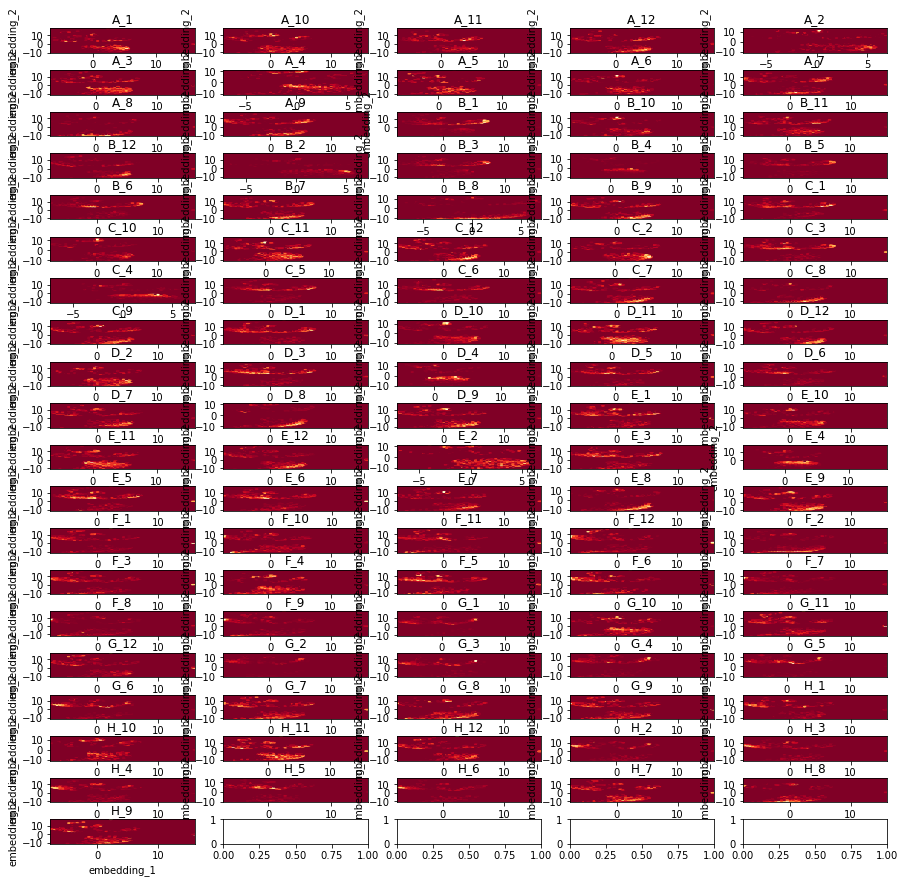

In [9]:
run_plot_hex(samples, col="Well",vals=None, norm_color=True, show_cbar=False)
plt.savefig(join(fig_dir, "umap_hex_wells.png"))
plt.savefig(join(fig_dir, "umap_hex_wells.pdf"))

2 1


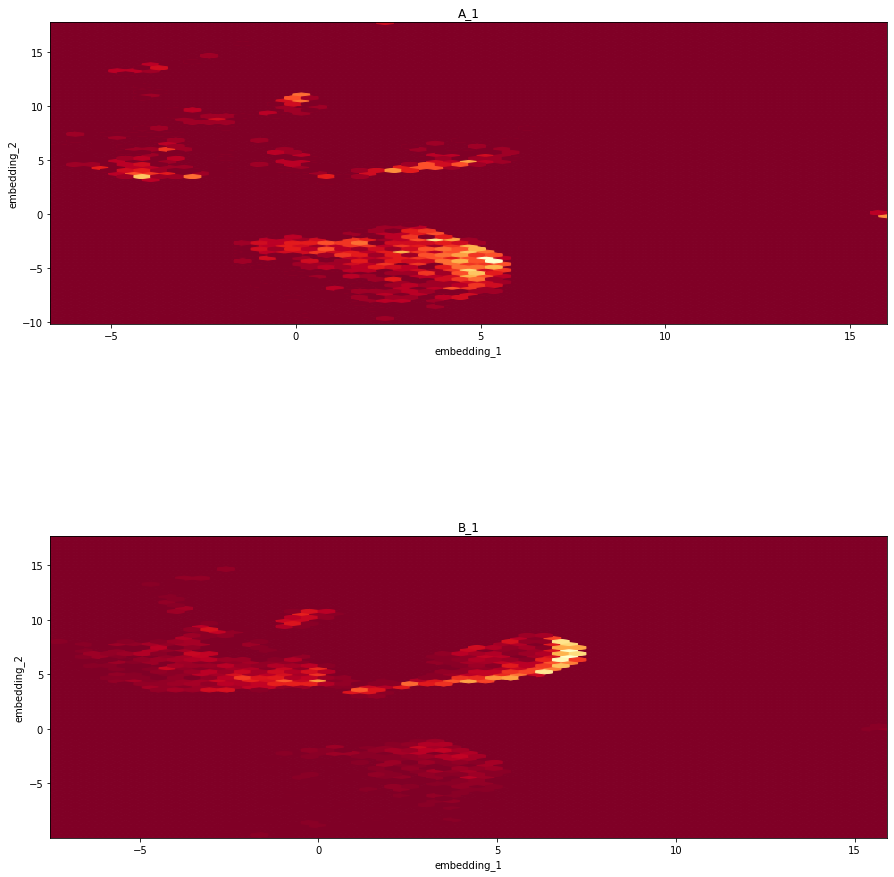

In [10]:
run_plot_hex(samples, col="Well",vals=["A_1","B_1"], norm_color=True)

## Plot UMAP embeddings colored by timepoints

(4427, 13)


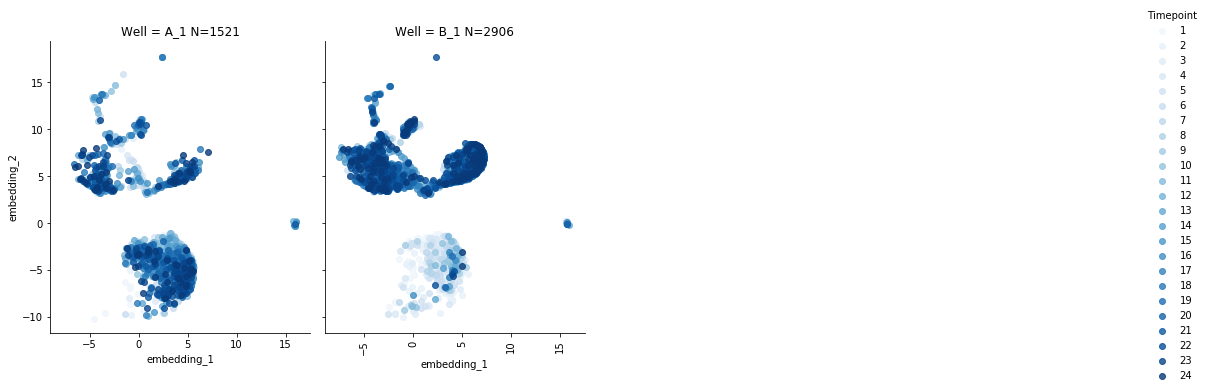

In [11]:
g = run_plot(samples, vals=["A_1","B_1"])
plt.savefig(join(fig_dir, "umap_wells_A1B1.png"))
plt.savefig(join(fig_dir, "umap_wells_A1B1.pdf"))

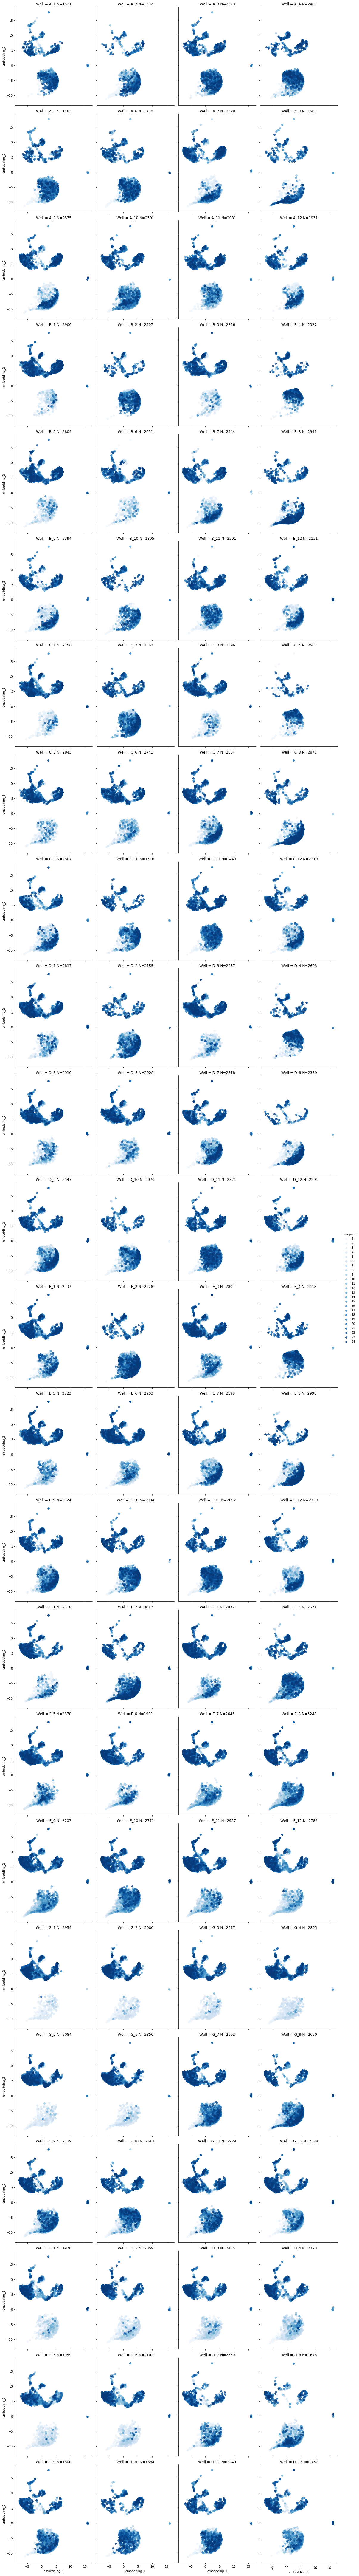

In [12]:
g = run_plot(samples, vals=None)
plt.savefig(join(fig_dir, "umap_wells.png"))
plt.savefig(join(fig_dir, "umap_wells.pdf"))

(15121, 13)


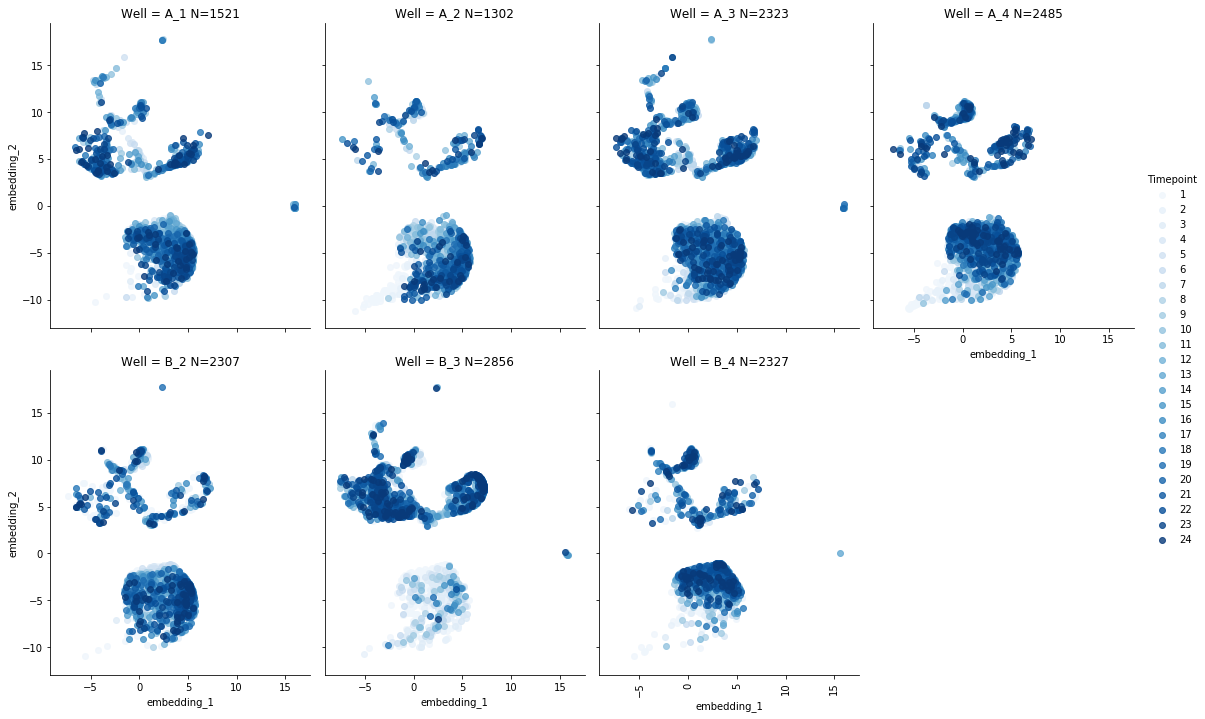

In [13]:
g = run_plot(samples, vals=["A_1", "A_2","A_3","A_4", "B_2", "B_3", "B_4"])
plt.savefig(join(fig_dir, "umap_wells_AB.png"))
plt.savefig(join(fig_dir, "umap_wells_AB.pdf"))